Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 1: Predicción de lluvias</center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 12 de abril



## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

## Introducción


Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias de distintos lugares de Australia.

A continuación, se describen las variables consideradas:

* Date:	Fecha (cualitativa)
* Location: Ubicación	(cualitativa)
* MinTemp: Temperatura mínima (Celsius)
* MaxTemp: Temperatura máxima (Celsius)
* Rainfall:  Cantidad de lluvia (mm)
* Evaporation: Cantidad de agua evaporada (mm)
* Sunshine: Número de horas de sol (horas)
* WindGustDir: Dirección del viento (cualitativa)
* WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (km/h)
* WindDir9am: Dirección del viento 9 am (cualitativa)
* WindDir3pm: Dirección del viento 3 pm (cualitativa)
* WindSpeed9am: Velocidad del viento 9 am (km/h)
* WindSpeed3pm: Velocidad del viento 3 pm (km/h)
* Humidity9am: Nivel de humedad 9 am (%)
* Humidity3pm: Nivel de humedad 3 pm (%)
* Pressure9am: Presión atmosférica 9 am (hPa)
* Pressure3pm: Presión atmosférica 3 pm (hPa)
* Cloud9am: Fracción de cielo cubierta por nubes 9 am (0-8)
* Cloud3pm: Fracción de cielo cubierta por nubes 3 pm (0-8)
* Temp9am: Temperatura 9 am 	(Celsius)
* Temp3pm: Temperatura 3 pm 	(Celsius)
* RainToday: ¿Llovió hoy? (Sí/No) (cualitativa)
* **RainTomorrow: ¿Lloverá mañana? (Sí/No) (cualitativa)**

En este caso, la variable RainTomorrow es la variable que se busca predecir.




## Parte 1: Carga y Preprocesamiento de Datos (15 puntos)

**En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.**

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.

**BONUS (4 puntos)**

Investigue e implemente una técnica de imputación de datos. Reemplace los valores nulos por los valores calculados. Mencione las limitaciones de la propuesta.

RESPUESTA:

In [2]:
#Lectura
data_0 = pd.read_csv("dataset.csv")
print(f'El dataset contiene {data_0.shape[1]} columnas y {data_0.shape[0]} filas.\n')

NA = data_0.isna().sum()
for name in data_0.columns:
    print(f'En la columna {name} hay {NA[name]} NA')

El dataset contiene 23 columnas y 145460 filas.

En la columna Date hay 0 NA
En la columna Location hay 0 NA
En la columna MinTemp hay 1485 NA
En la columna MaxTemp hay 1261 NA
En la columna Rainfall hay 3261 NA
En la columna Evaporation hay 62790 NA
En la columna Sunshine hay 69835 NA
En la columna WindGustDir hay 10326 NA
En la columna WindGustSpeed hay 10263 NA
En la columna WindDir9am hay 10566 NA
En la columna WindDir3pm hay 4228 NA
En la columna WindSpeed9am hay 1767 NA
En la columna WindSpeed3pm hay 3062 NA
En la columna Humidity9am hay 2654 NA
En la columna Humidity3pm hay 4507 NA
En la columna Pressure9am hay 15065 NA
En la columna Pressure3pm hay 15028 NA
En la columna Cloud9am hay 55888 NA
En la columna Cloud3pm hay 59358 NA
En la columna Temp9am hay 1767 NA
En la columna Temp3pm hay 3609 NA
En la columna RainToday hay 3261 NA
En la columna RainTomorrow hay 3267 NA


In [3]:
#Eliminar columnas con NA
data = data_0.dropna()
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


Debido a la existencia de datos no numéricos, he decidido realizar la imputación reemplazando cada NA con el dato más frecuente de dicha columna. Sin embargo, he optado por no seguir trabajando con el dataset formado, ya que los datos que ya en un principio tenian un peso grande, resultan con un peso aún más resaltado.

In [4]:
moda = data_0.copy()
for nombre in data.columns:
    moda[str(nombre)].fillna(data[str(nombre)].mode()[0], inplace=True)

moda.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 1.2 Análisis descriptivo (6 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las siguientes variables:

* RainTomorrow
* Cantidad total de lluvia caída (Rainfall) por ubicación (Location). ¿Qué lugar presenta la mayor cantidad de agua caída?
* Muestre la relación entre la temperatura a las 9 am (Temp9am) y la temperatura a las 3 pm (Temp3pm).
* Muestre la relación existente entre el número de horas de sol (Sunshine) y la variable RainTomorrow

Comente todos los resultados obtenidos.

RESPUESTA:

In [59]:
#RainTomorrow
rt = data['RainTomorrow']
print(f'Hay {rt.value_counts()["No"]} días donde no llueve al siguiente día.')
print(f'Hay {rt.value_counts()["Yes"]} días donde si llueve al siguiente día.')
print(f'El {(rt.value_counts()["No"]*100/(rt.value_counts()["No"]+rt.value_counts()["Yes"])).round(2)}% de los días no llueven al siguiente día.')

Hay 43993 días donde no llueve al siguiente día.
Hay 12427 días donde si llueve al siguiente día.
El 77.97% de los días no llueven al siguiente día.


In [67]:
head = {'Año' : [], "No llueve al día siguiente": [], "Si llueve al día siguiente": []}
years = pd.DataFrame(head)
head = {'Mes' : [], "No llueve al día siguiente": [], "Si llueve al día siguiente": []}
months = pd.DataFrame(head)

def year(s):
    return s.split('-')[0]

def month(s):
    return s.split('-')[1]

date_data = data.copy()

date_data['Año'] = data['Date'].apply(year)
date_data['Mes'] = data['Date'].apply(month)

#data.plot.scatter("Date", "RainTomorrow", s = 0.1, color = 'RoyalBlue')
#plt.plot(data['Temp9am'], Y_pred, color='red')
#plt.show()

In [70]:
yes_mon = date_data[date_data["RainTomorrow"] == 'Yes']['Mes']
no_mon = date_data[date_data["RainTomorrow"] == 'No']['Mes']

for mon in range(1,13):
    months.loc[len(months.index)] = [mon, int(no_mon.value_counts()[mon]), int(yes_mon.value_counts()[hora])] 

months

IndexError: index 14 is out of bounds for axis 0 with size 12

In [ ]:
ran = []
for i in range(2009, 2018):
    ran.append(i)

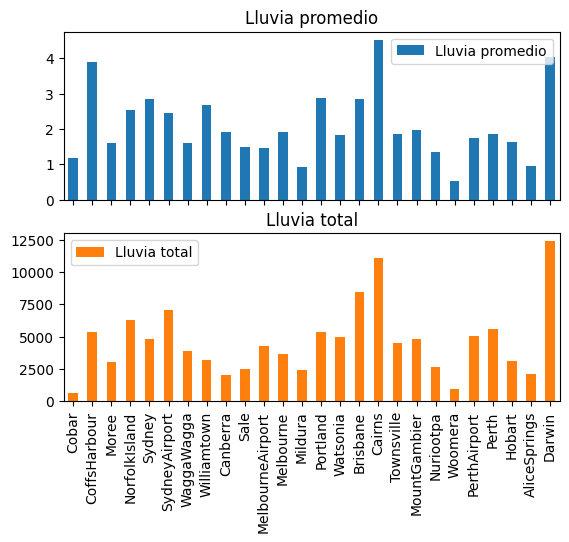

In [72]:
#RainFall v/s Location
places = data['Location'].unique()
statistics = pd.DataFrame()

for place in places:
    rows = data[data["Location"] == place]
    mean = rows['Rainfall'].mean()
    sum = rows['Rainfall'].sum()
    statistics[place] = {'Lluvia promedio': mean, 'Lluvia total' : sum}

statistics = statistics.transpose()

axes = statistics.plot.bar(rot = 90, subplots = True)
axes[1].legend(loc=2)  

Como se aprecia, el lugar con mayor lluvia total como suma es Darwin, mientras que el lugar con mayor lluvia promedio es Cairns.

La correlación de ambas columnas es: 0.870619650287649


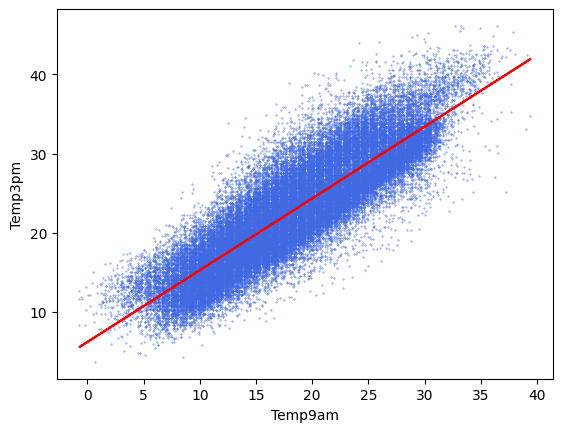

El valor de R cuadrado es 0.7579785754669879


In [99]:
#Temperaturas 9AM v/s 3PM

X = data[['Temp9am']].to_numpy()
Y = data[['Temp3pm']].to_numpy()
print(f"La correlación de ambas columnas es: {data['Temp9am'].corr(data['Temp3pm'])}")

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

data.plot.scatter("Temp9am", "Temp3pm", s = 0.1, color = 'RoyalBlue')
plt.plot(data['Temp9am'], Y_pred, color='red')
plt.show()

print(f'El valor de R cuadrado es {linear_regressor.score(X, Y)}')

Luego, es posible concluír que existe una fuerte correlación entre ambas variables. Es más, se puede concluír que las variables son fuertemente correlacionadas linealmente.

<Axes: title={'center': 'Frecuencia de cantidad de horas de sol'}, xlabel='Cantidad de horas de sol', ylabel='Frecuecia'>

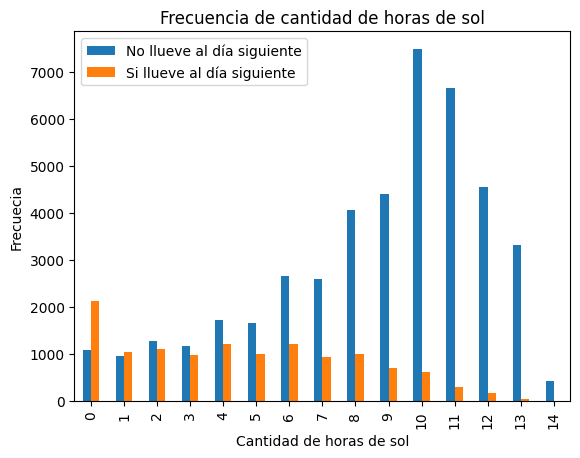

In [8]:
yes_s = data[data["RainTomorrow"] == 'Yes']['Sunshine']
no_s = data[data["RainTomorrow"] == 'No']['Sunshine']

yes_s_int = yes_s.apply(round)
no_s_int = no_s.apply(round)

head = {'N Horas': [], "No llueve al día siguiente": [], "Si llueve al día siguiente": []}
total = pd.DataFrame(head)

for hora in range(15):
    total.loc[len(total.index)] = [hora, int(no_s_int.value_counts()[hora]), int(yes_s_int.value_counts()[hora])] 

fig, ax = plt.subplots()

plt.title("Frecuencia de cantidad de horas de sol")

total[["No llueve al día siguiente", "Si llueve al día siguiente"]].plot(ax=ax, kind='bar', xlabel='Cantidad de horas de sol', ylabel='Frecuecia')


<Axes: title={'center': 'Frecuencia de cantidad de horas de sol (Normalizado)'}, xlabel='Cantidad de horas de sol', ylabel='Frecuecia'>

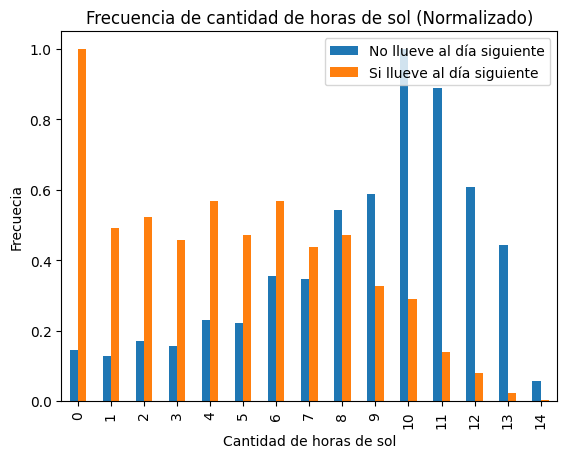

In [9]:
total_norm = pd.DataFrame(head)

total_norm["N Horas"] = total["N Horas"]
total_norm["No llueve al día siguiente"] = total["No llueve al día siguiente"] /total["No llueve al día siguiente"].abs().max() 
total_norm["Si llueve al día siguiente"] = total["Si llueve al día siguiente"] /total["Si llueve al día siguiente"].abs().max() 

fig, ax = plt.subplots()
plt.title("Frecuencia de cantidad de horas de sol (Normalizado)")
total_norm[["No llueve al día siguiente", "Si llueve al día siguiente"]].plot(ax=ax, kind='bar', xlabel='Cantidad de horas de sol', ylabel='Frecuecia')

El primer gráfico muestra los datos directos, mientras que el segundo los muestra normalizados. Se deduce del segundo gráfico que los días donde no llueve al siguiente día presentan normalmente más horas de sol que los otros días.

### 1.3 Normalizar datos (4 puntos)

Realice un proceso de normalización del conjunto de datos. Para las variables cuantitativas utilice MinMaxScaler y para las variables cualitativas trabaje con el enfoque OneHotEncoder.

Explique por qué es útil realizar esta acción.

Observación: No considere las variables Date y RainTomorrow.

RESPUESTA:

Primero veemos cuales son los datos en cuestión:

In [10]:
data.iloc[0]

Date             2009-01-01
Location              Cobar
MinTemp                17.9
MaxTemp                35.2
Rainfall                0.0
Evaporation            12.0
Sunshine               12.3
WindGustDir             SSW
WindGustSpeed          48.0
WindDir9am              ENE
WindDir3pm               SW
WindSpeed9am            6.0
WindSpeed3pm           20.0
Humidity9am            20.0
Humidity3pm            13.0
Pressure9am          1006.3
Pressure3pm          1004.4
Cloud9am                2.0
Cloud3pm                5.0
Temp9am                26.6
Temp3pm                33.4
RainToday                No
RainTomorrow             No
Name: 6049, dtype: object

Luego, las columnas 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' son los únicos (sacando las dos columnas que pide sacar el enunciado) que presentan datos cualitativos

In [11]:
all = {name for name in data.columns}
cual = {'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'}
cuan = all - cual

#DataFrame de datos cualitativos y cuantitativos
data_l = data[list(cual)]
data_n = data[list(cuan)]
data_n = data_n.drop(['RainTomorrow', 'Date'], axis = 1)

data_n.head()

,WindSpeed9am,Rainfall,MinTemp,Evaporation,Humidity9am,WindGustSpeed,Sunshine,MaxTemp,Cloud9am,Temp9am,Pressure9am,Pressure3pm,Temp3pm,Humidity3pm,Cloud3pm,WindSpeed3pm
6049,6.0,0.0,17.9,12.0,20.0,48.0,12.3,35.2,2.0,26.6,1006.3,1004.4,33.4,13.0,5.0,20.0
6050,19.0,0.0,18.4,14.8,30.0,37.0,13.0,28.9,1.0,20.3,1012.9,1012.1,27.0,8.0,1.0,19.0
6052,30.0,0.0,19.4,10.8,42.0,46.0,10.6,37.6,1.0,28.7,1012.3,1009.2,34.9,22.0,6.0,15.0
6053,6.0,0.0,21.9,11.4,37.0,31.0,12.2,38.4,1.0,29.1,1012.7,1009.1,35.6,22.0,5.0,6.0
6054,17.0,0.0,24.2,11.2,19.0,35.0,8.4,41.0,1.0,33.6,1010.7,1007.4,37.6,15.0,6.0,13.0


In [110]:
min_max_scaler = preprocessing.MinMaxScaler()

enc = preprocessing.OneHotEncoder(categories = 'auto')

#Escalamiento según naturaleza de datos
l_scaled = enc.fit_transform(data_l).toarray()
n_scaled =  min_max_scaler.fit_transform(data_n)

data_norm = data.copy()

c = 0
for name in data_n.columns:
    data_norm[name] = np.transpose(n_scaled)[c]
    c += 1

c = 0
for name in data_l.columns:
    data_norm[name] =np.transpose(l_scaled)[c]
    c+=1

data_norm = data_norm.drop(['RainTomorrow', 'Date'], axis = 1)

data_norm.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,0.0,0.645669,0.706818,0.0,0.147783,0.848276,0.0,0.339130,0.0,0.0,...,0.243243,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.680798,0.700472,1.0
6050,0.0,0.658793,0.563636,0.0,0.182266,0.896552,0.0,0.243478,0.0,0.0,...,0.229730,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.523691,0.549528,1.0
6052,0.0,0.685039,0.761364,0.0,0.133005,0.731034,0.0,0.321739,0.0,0.0,...,0.175676,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.733167,0.735849,1.0
6053,0.0,0.750656,0.779545,0.0,0.140394,0.841379,0.0,0.191304,0.0,0.0,...,0.054054,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.743142,0.752358,1.0
6054,0.0,0.811024,0.838636,0.0,0.137931,0.579310,0.0,0.226087,0.0,0.0,...,0.148649,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.855362,0.799528,1.0


Se realiza este preprocesamiento ya que variables con distinta escala no contribuyen de igual manera en el entrenamiento de un modelo. Por ejemplo, la variable 'Temp3pm' es numéricamente mucho menor que la variable 'Pressure3pm', por lo que esta última infuiría mucho más que la primera si es que no se normalizan los datos.

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan las mayores relaciones lineales.

Observación: Para este análisis solo trabaje con las variables cuantitativas normalizadas en el paso anterior.

RESPUESTA:

In [111]:
# Correlación
corr = data_norm.corr()
corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
Location,1.000000,0.013046,0.159965,-0.033919,0.192588,0.097202,-0.028266,0.008223,-0.047596,-0.043096,...,-0.031603,-0.299627,-0.256479,-0.028706,-0.069252,-0.105768,-0.085723,0.118353,0.170247,-0.019797
MinTemp,0.013046,1.000000,0.749687,0.110800,0.506764,0.076087,-0.124783,0.118054,0.106245,0.254172,...,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.005535
MaxTemp,0.159965,0.749687,1.000000,-0.069981,0.650964,0.463913,-0.077193,0.035531,0.074766,0.162780,...,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,0.028132
Rainfall,-0.033919,0.110800,-0.069981,1.000000,-0.077239,-0.246379,-0.004446,0.106308,0.024289,0.072556,...,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,-0.013210
Evaporation,0.192588,0.506764,0.650964,-0.077239,1.000000,0.369250,-0.044322,0.209566,-0.003707,0.030354,...,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,0.030285
Sunshine,0.097202,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.012481,-0.052422,0.027237,-0.004035,...,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,0.025834
WindGustDir,-0.028266,-0.124783,-0.077193,-0.004446,-0.044322,-0.012481,1.000000,-0.004299,-0.032800,-0.029698,...,-0.021834,0.052783,-0.017000,0.022681,0.019634,0.005575,0.000392,-0.114020,-0.077436,-0.013643
WindGustSpeed,0.008223,0.118054,0.035531,0.106308,0.209566,-0.052422,-0.004299,1.000000,-0.221859,-0.044569,...,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,-0.033831
WindDir9am,-0.047596,0.106245,0.074766,0.024289,-0.003707,0.027237,-0.032800,-0.221859,1.000000,-0.050008,...,-0.239014,-0.028524,0.044449,0.037538,0.014530,-0.033310,-0.044319,0.129178,0.070007,-0.022972
WindDir3pm,-0.043096,0.254172,0.162780,0.072556,0.030354,-0.004035,-0.029698,-0.044569,-0.050008,1.000000,...,0.057499,0.037857,0.119328,-0.094670,-0.113929,0.013611,-0.002993,0.245746,0.160660,-0.020800


<Figure size 3000x3000 with 0 Axes>

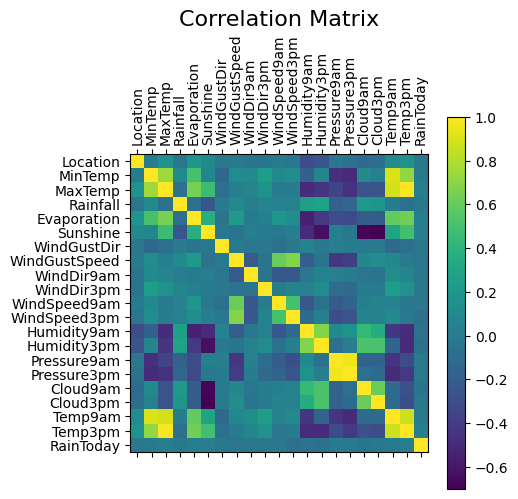

In [118]:
#Visualización
f = plt.figure(figsize=(30, 30))
plt.matshow(corr)
plt.xticks(ticks = range(21),labels = data_norm.columns, fontsize=10, rotation=90)
plt.yticks(ticks = range(21), labels = data_norm.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

De donde se concluye que las mayores correlaciones entre columnas distintas son:
- Pressure9am v/s Presure3pm
- Temp3pm v/s MaxTemp
- Temp9am v/s MaxTemp
- Temp9am v/s MinTemp

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Comente.

RESPUESTA:

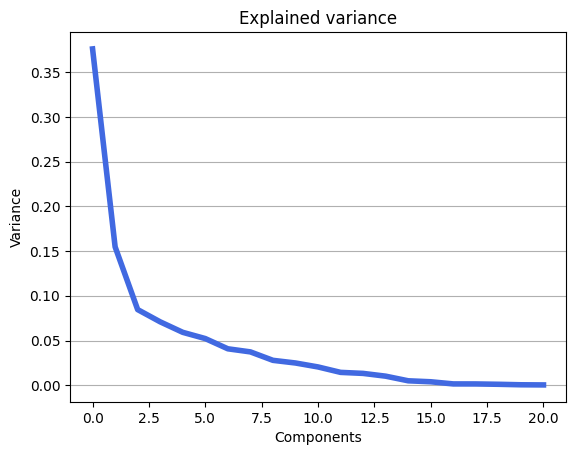

In [122]:
#Código de profesor
def plot_var_curve(X):
    plt.plot(X, lw=4, color = 'RoyalBlue')
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')

#Cantidad máxima de componenetes = 21
pca = PCA(n_components=21)
pca.fit(data_norm)

plot_var_curve(pca.explained_variance_ratio_)

Luego, la varianza decrece a medida que la cantidad de componentes aumenta, que tiene sentido con los visto en clases. 

### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [123]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.9,pca.explained_variance_ratio_)

9

Se requieren 9 componentes para captar un 90% de la varianza.

### 2.3 Reducir dimensionalidad a n=6 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 6 . Determine la proporción de varianza explicada.

RESPUESTA:

In [124]:
pca_6 = PCA(n_components=6)
data_6= pca_6.fit_transform(data_norm)

In [125]:
variance = 0
for i in range(6):
    variance += pca.explained_variance_ratio_[i]

variance

0.7974348233562217

Se explica un 79.73% de la varianza.

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

In [127]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_6)
scores = lof.negative_outlier_factor_

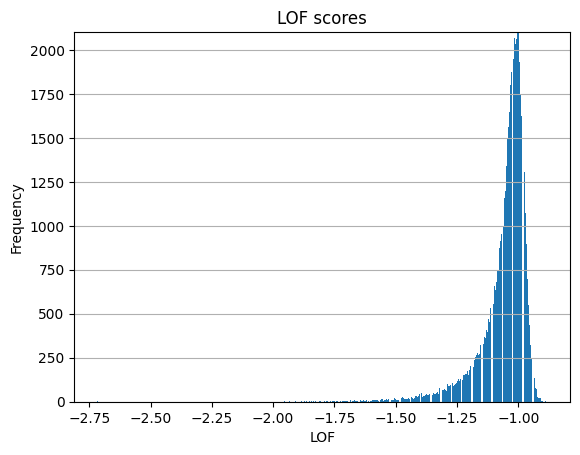

In [128]:
#Código de profesor
def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

plot_hist(scores, 'LOF scores')

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -2, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

In [136]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

print(f'Se han sacado un {round((lof_threshold(-2,scores)*100),3)}% de los datos')
exc = lof_threshold(-2,scores)

Se han sacado un 0.028% de los datos


In [137]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination = exc)
labels = lof.fit_predict(data_6)

In [138]:
indices = list(np.where(labels==1)[0])
data_6 = data_6[indices,:] 

## Parte 4: Visualización T-SNE y UMAP (12 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (5 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.


RESPUESTA:

La idea de T-SNE es reducir la dimensión de datos para una visualización sencilla. La reducción de datos se realiza de tal forma que datos que inician cerca terminan cerca, y datos que terminan cerca vienen de datos parecidos. Esto se logra por medio de la modelación de la distribución de probabilidad del vecindario de un punto de los datos, creando un mapeo entre una distribución gaussiana (del espacio de los datos) con una distribución t-student (en el espacio de proyección), que a su vez minimice la diferencia de estas distribuciones sobre todos los puntos de datos. Esta diferencia se trabaja numéricamente, por lo que la base de datos deben ser sólo números.

In [147]:
from sklearn.manifold import TSNE

#Reducción de datos
data_n_red = data_norm[:1000]

#Para los parametros solo hice pruebas para ir viendo el mejor fit
tsne_embed = TSNE(n_components=2, perplexity = 30, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection_tsne = tsne_embed.fit_transform(data_n_red)

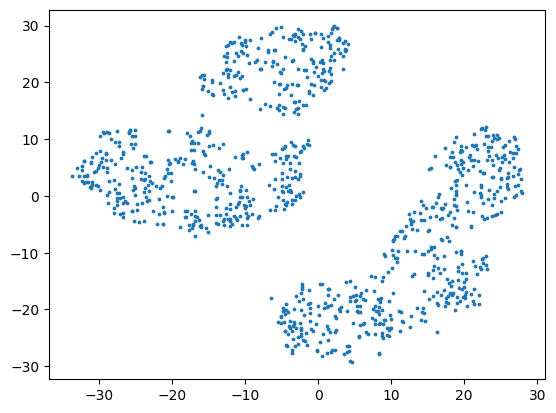

In [163]:
plt.scatter(projection_tsne[:,0],projection_tsne[:,1], s=3)

### 4.2 UMAP (5 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.

RESPUESTA:

Al igual que T-SNE, UMAP es un método de reducción de dimensionalidad comunmente usado para la visualización de información. La forma que logra esto es a través de la creación de un grafo multidimensional que capture la estructura (cercanía) de los datos por medio de intersección de hyperesferas de radios seleccionados localmente. Posteriormente, se busca optimizar un grafo lo más similar posible pero que viva en una menor dimensión.

Según bibliografía, UMAP es más rápido y escalable que T-SNE, además de que capta mejor la estructura global de la base de datos.

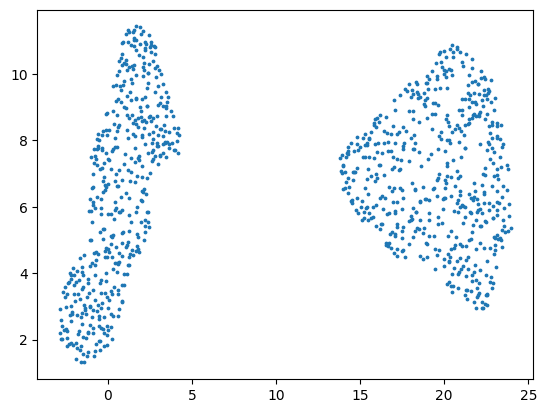

In [150]:
import umap.umap_ as umap

#Probé parametros hasta estar contento
umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 30, n_jobs=5)
projection_umap = umap_2d.fit_transform(data_n_red)
plt.scatter(projection_umap[:,0],projection_umap[:,1], s=3)

### 4.3 Comparar resultados (2 puntos)

Compare los resultados obtenidos por T-SNE y UMAP.

RESPUESTA:

Los resultados son similares para ambos algoritmos: 2 estructuras claramente seperadas entre sí. Sin embargo, UMAP presenta los datos ligeramente más aglutinados, pero esto se puede deber a la selección de parámetros. Por otro lado, T-SNE presenta una pequeña división de uno de sus clusters, pero no llega a ser lo suficientemente distinguible para determinar un nuevo cluster.

# Parte 5: Cluster (13 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 5.1 Descripción K-means (4 puntos)

Describa el método k-means. Mencione sus principales fortalezas y limitaciones.

RESPUESTA:

La idea de KMeans es generar cluster por medio de iteración de centros de gravedad. Primero, se determinan centros de cluster aleatoriamente. Posteriormente, en cada paso, se busca el centro de gravedad de cada cluster y dado ese conjunto de puntos, todo dato se asocia con el centro más cercano. Esto se realiza hasta llegar a una cantidad de iteraciones o converger.

Una fortaleza de kmeans es que siempre converge. Además, se converge siempre a la configuración que minimiza la suma de cuadrados de distancia entre centros de cluster y sus respectivos elementos del cluster.

Una limitancia es su complejidad. Además, no dice nada sobre el número óptimo de clusters, dejando a criterio del programador este valor.

### 5.2 Aplicación K-means (5 puntos)

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]`
* Realizar un gráfico ELBOW
* Obtener el Silhoutte Score para distintos números de cluster y graficar  
* Determinar el número de clusters óptimo

RESPUESTA:

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

estimators = []
k_range = [2, 3, 4, 5, 6, 7]
elbow = []
data_n_red = data_norm[:1000]
silueta = []

for k in k_range:
    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data_n_red)
    elbow.append(estimator[-1].inertia_/k)
    sil = silhouette_score(data_n_red, estimator[-1].labels_, metric="euclidean",)
    silueta.append(sil)
    print(f'Silueta para k={k} es {sil}')


Silueta para k=2 es 0.3549213884374802
Silueta para k=3 es 0.33276389710783333
Silueta para k=4 es 0.345615976198119
Silueta para k=5 es 0.3300737553480472
Silueta para k=6 es 0.32285259119697063
Silueta para k=7 es 0.2739086750299924


Text(0, 0.5, 'Inercia promedio')

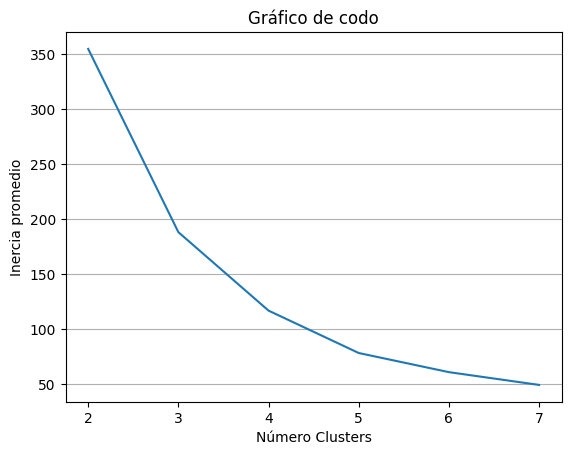

In [171]:
plt.plot(k_range, elbow)
plt.title('Gráfico de codo')
plt.grid(axis='y')
plt.xlabel('Número Clusters')
plt.ylabel('Inercia promedio')

Text(0, 0.5, 'Silhouette Score')

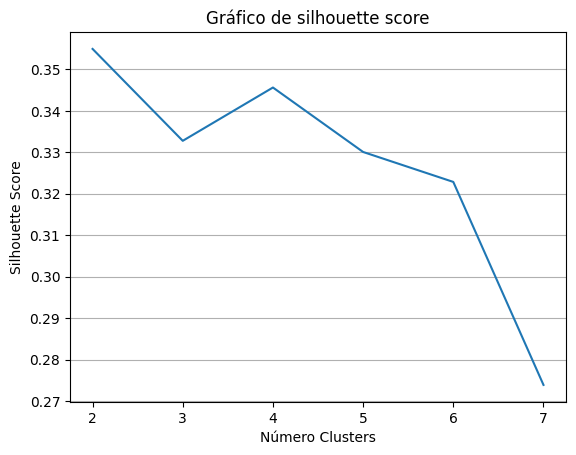

In [170]:
plt.plot(k_range, silueta)
plt.title('Gráfico de silhouette score')
plt.grid(axis='y')
plt.xlabel('Número Clusters')
plt.ylabel('Silhouette Score')

Sigue que el valor óptimo de clusters suele ser k=2. Sin embargo, algunas veces me entrega que el número óptimo es K=4 pero esta es la minoría de los casos.

### 5.3: Graficar clusters (4 puntos)

Utilizando los resultados obtenidos en la parte 4, vuelva a graficar las representaciones de T-SNE y UMAP indicando el cluster al que corresponde cada punto. Para ello, utilice el número de clusters óptimo obtenido en la parte 5. Comente los resultados.

RESPUESTA:

Text(0.5, 1.0, 'Kmeans = 2 para algorimo UMAP')

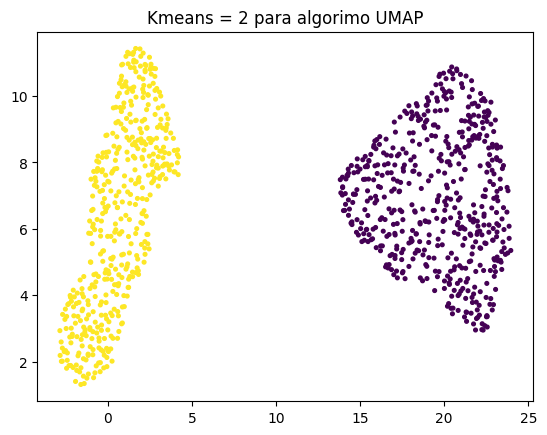

In [173]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
trans = kmeans.fit_transform(np.array([projection_umap[:,0],projection_umap[:,1]]).transpose())
plt.scatter(projection_umap[:,0],projection_umap[:,1], s = 7, c = kmeans.predict(np.array([projection_umap[:,0],projection_umap[:,1]]).transpose()))
plt.title('Kmeans = 2 para algorimo UMAP')

Text(0.5, 1.0, 'Kmeans = 2 para algorimo T-SNE')

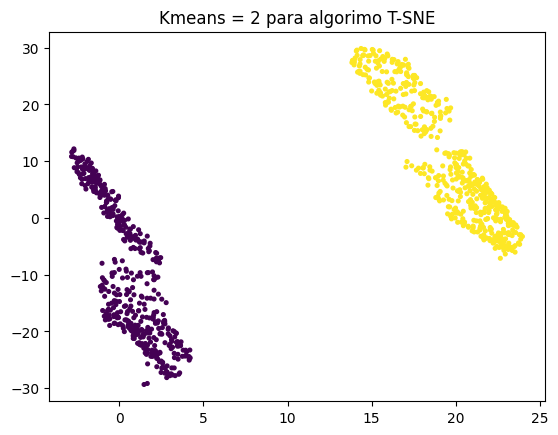

In [174]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
trans = kmeans.fit_transform(np.array([projection_tsne[:,0],projection_tsne[:,1]]).transpose())
plt.scatter(projection_umap[:,0],projection_tsne[:,1], s = 7, c = kmeans.predict(np.array([projection_tsne[:,0],projection_tsne[:,1]]).transpose()))
plt.title('Kmeans = 2 para algorimo T-SNE')

Para esta configuración, k=2 aparenta ser el mejor número de clusters, ya que en ambas proyeccones el resultado se ajustó muy bien.

### Bibliografía

- https://pair-code.github.io/understanding-umap/
- https://www.displayr.com/using-t-sne-to-visualize-data-before-prediction/#:~:text=The%20main%20advantage%20of%20t,also%20produces%20beautiful%20looking%20visualizations.
